In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

!pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
# deep learning
from keras.models import Model, Sequential
from keras import regularizers
from keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Dense,
    Flatten,
    Dropout,
    BatchNormalization,
)
from keras.optimizers import Adam

data = pd.read_excel("/content/Customer Transactions Data - Tshidiso.xlsx")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.5 MB/s eta 0:00:00


In [ ]:
data.head()

,CreatedOn,Branch,ClientID,AccountNo,Amount,TrxType
0,2021-01-28 08:29:00,Mbabane,2,1440000021,390000.00,A
1,2021-02-24 00:00:00,Mbabane,2,1440000021,113.18,Z
2,2021-08-05 05:34:00,Mbabane,21,1310000216,12176.00,Z
3,2022-08-31 05:45:00,Mbabane,1133,1320011331,9290.00,Z
4,2022-08-31 05:45:00,Mbabane,1133,1320011331,7000.00,Z


In [ ]:
data.tail()

,CreatedOn,Branch,ClientID,AccountNo,Amount,TrxType
32923,2022-12-06 16:24:00,Tshaneni,45910,5370459101,57456.30,Z
32924,2022-12-06 16:24:00,Tshaneni,45910,5370459101,4162.45,Z
32925,2022-12-06 16:24:00,Tshaneni,45910,5370459101,2155.00,A
32926,2022-12-07 14:54:00,Tshaneni,45930,5470459301,22230.00,Z
32927,2022-12-16 13:39:00,Tshaneni,46002,5370460021,15000.00,Z


In [ ]:
data.columns

Index(['CreatedOn', 'Branch', 'ClientID', 'AccountNo', 'Amount', 'TrxType'], dtype='object')

In [ ]:
data.shape

(32928, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32928 entries, 0 to 32927
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   CreatedOn  32928 non-null  datetime64[ns]
 1   Branch     32928 non-null  object        
 2   ClientID   32928 non-null  int64         
 3   AccountNo  32928 non-null  int64         
 4   Amount     32928 non-null  float64       
 5   TrxType    32928 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
data.describe(include = 'all')

<ipython-input-7-2258166cf291>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = 'all')


,CreatedOn,Branch,ClientID,AccountNo,Amount,TrxType
count,32928,32928,32928.000000,3.292800e+04,3.292800e+04,32928
unique,1007,3,NaN,NaN,NaN,3
top,2022-01-10 10:21:00,Mbabane,NaN,NaN,NaN,Z
freq,258,12399,NaN,NaN,NaN,16819
first,2021-01-04 18:34:00,NaN,NaN,NaN,NaN,NaN
last,2022-12-16 13:39:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,29291.549745,3.610105e+09,4.476745e+04,NaN
std,NaN,NaN,12473.528418,1.775495e+09,1.878057e+05,NaN
min,NaN,NaN,2.000000,1.110036e+09,1.012400e+02,NaN
25%,NaN,NaN,19627.000000,1.330159e+09,2.000000e+03,NaN


In [ ]:
corr = data.corr()
corr

<ipython-input-8-df690e1cacaf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,ClientID,AccountNo,Amount
ClientID,1.000000,-0.204924,-0.081962
AccountNo,-0.204924,1.000000,0.103773
Amount,-0.081962,0.103773,1.000000


In [ ]:
data.isnull().sum().any()

False

In [ ]:
data.duplicated().sum()

275

In [ ]:
duplicate = data[data.duplicated()]
duplicate

,CreatedOn,Branch,ClientID,AccountNo,Amount,TrxType
34,2021-01-26 06:50:00,Mbabane,2224,1420433151,850.0,A
42,2021-10-05 16:51:00,Mbabane,2224,1420433151,850.0,A
43,2021-10-05 16:51:00,Mbabane,2224,1420433151,850.0,A
44,2021-10-05 16:51:00,Mbabane,2224,1420433151,850.0,A
47,2022-01-31 07:08:00,Mbabane,2224,1420433151,850.0,A
...,...,...,...,...,...,...
30929,2022-03-02 15:56:00,Tshaneni,42870,5310428701,4024.0,A
31397,2021-10-29 07:59:00,Tshaneni,43362,5530433622,800.0,Z
31857,2021-05-06 09:29:00,Tshaneni,43756,5330437561,30000.0,Z
32015,2022-04-20 14:39:00,Tshaneni,44063,5320440631,50000.0,Z


In [ ]:
df1=data.drop_duplicates()

In [ ]:
df1.duplicated().sum().any()

False

In [ ]:
df1

,CreatedOn,Branch,ClientID,AccountNo,Amount,TrxType
0,2021-01-28 08:29:00,Mbabane,2,1440000021,390000.00,A
1,2021-02-24 00:00:00,Mbabane,2,1440000021,113.18,Z
2,2021-08-05 05:34:00,Mbabane,21,1310000216,12176.00,Z
3,2022-08-31 05:45:00,Mbabane,1133,1320011331,9290.00,Z
4,2022-08-31 05:45:00,Mbabane,1133,1320011331,7000.00,Z
...,...,...,...,...,...,...
32923,2022-12-06 16:24:00,Tshaneni,45910,5370459101,57456.30,Z
32924,2022-12-06 16:24:00,Tshaneni,45910,5370459101,4162.45,Z
32925,2022-12-06 16:24:00,Tshaneni,45910,5370459101,2155.00,A
32926,2022-12-07 14:54:00,Tshaneni,45930,5470459301,22230.00,Z


In [ ]:
df1['Year']=df1[ "CreatedOn"].dt.year

<ipython-input-15-4e2e591b3c1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year']=df1[ "CreatedOn"].dt.year


In [ ]:
df1['Month']=df1[ "CreatedOn"].dt.month

<ipython-input-16-e8e1448aeb3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month']=df1[ "CreatedOn"].dt.month


In [ ]:
df1['Day']=df1[ "CreatedOn"].dt.day

<ipython-input-17-767e53bc13b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day']=df1[ "CreatedOn"].dt.day


In [ ]:
df1['Times']=df1[ "CreatedOn"].dt.time
df1['Times'] = df1['Times'].astype(str)

<ipython-input-18-35b76eb9df9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Times']=df1[ "CreatedOn"].dt.time
<ipython-input-18-35b76eb9df9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Times'] = df1['Times'].astype(str)


In [ ]:
df = df1.drop('CreatedOn', axis=1)
df

,Branch,ClientID,AccountNo,Amount,TrxType,Year,Month,Day,Times
0,Mbabane,2,1440000021,390000.00,A,2021,1,28,08:29:00
1,Mbabane,2,1440000021,113.18,Z,2021,2,24,00:00:00
2,Mbabane,21,1310000216,12176.00,Z,2021,8,5,05:34:00
3,Mbabane,1133,1320011331,9290.00,Z,2022,8,31,05:45:00
4,Mbabane,1133,1320011331,7000.00,Z,2022,8,31,05:45:00
...,...,...,...,...,...,...,...,...,...
32923,Tshaneni,45910,5370459101,57456.30,Z,2022,12,6,16:24:00
32924,Tshaneni,45910,5370459101,4162.45,Z,2022,12,6,16:24:00
32925,Tshaneni,45910,5370459101,2155.00,A,2022,12,6,16:24:00
32926,Tshaneni,45930,5470459301,22230.00,Z,2022,12,7,14:54:00


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['TrxType']= label_encoder.fit_transform(df['TrxType'])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Branch']= label_encoder.fit_transform(df['Branch'])

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
df['Times'] = pd.to_datetime(df['Times'])

df['hour'] = df['Times'].dt.hour
df['minute'] = df['Times'].dt.minute
df['second'] = df['Times'].dt.second

df['Time'] = df['hour'] * 3600 + df['minute'] * 60 + df['second']

df = df.drop(['Times', 'hour', 'minute', 'second'], axis=1)
df.head()

,Branch,ClientID,AccountNo,Amount,TrxType,Year,Month,Day,Time
0,0,2,1440000021,390000.00,0,2021,1,28,30540
1,0,2,1440000021,113.18,2,2021,2,24,0
2,0,21,1310000216,12176.00,2,2021,8,5,20040
3,0,1133,1320011331,9290.00,2,2022,8,31,20700
4,0,1133,1320011331,7000.00,2,2022,8,31,20700


In [ ]:
pd.DataFrame(df.nunique(), columns = ["Number of unique values"])

,Number of unique values
Branch,3
ClientID,1471
AccountNo,2458
Amount,13943
TrxType,3
Year,2
Month,12
Day,31
Time,611


<ipython-input-24-39f475d2259f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-24-39f475d2259f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-24-39f475d2259f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

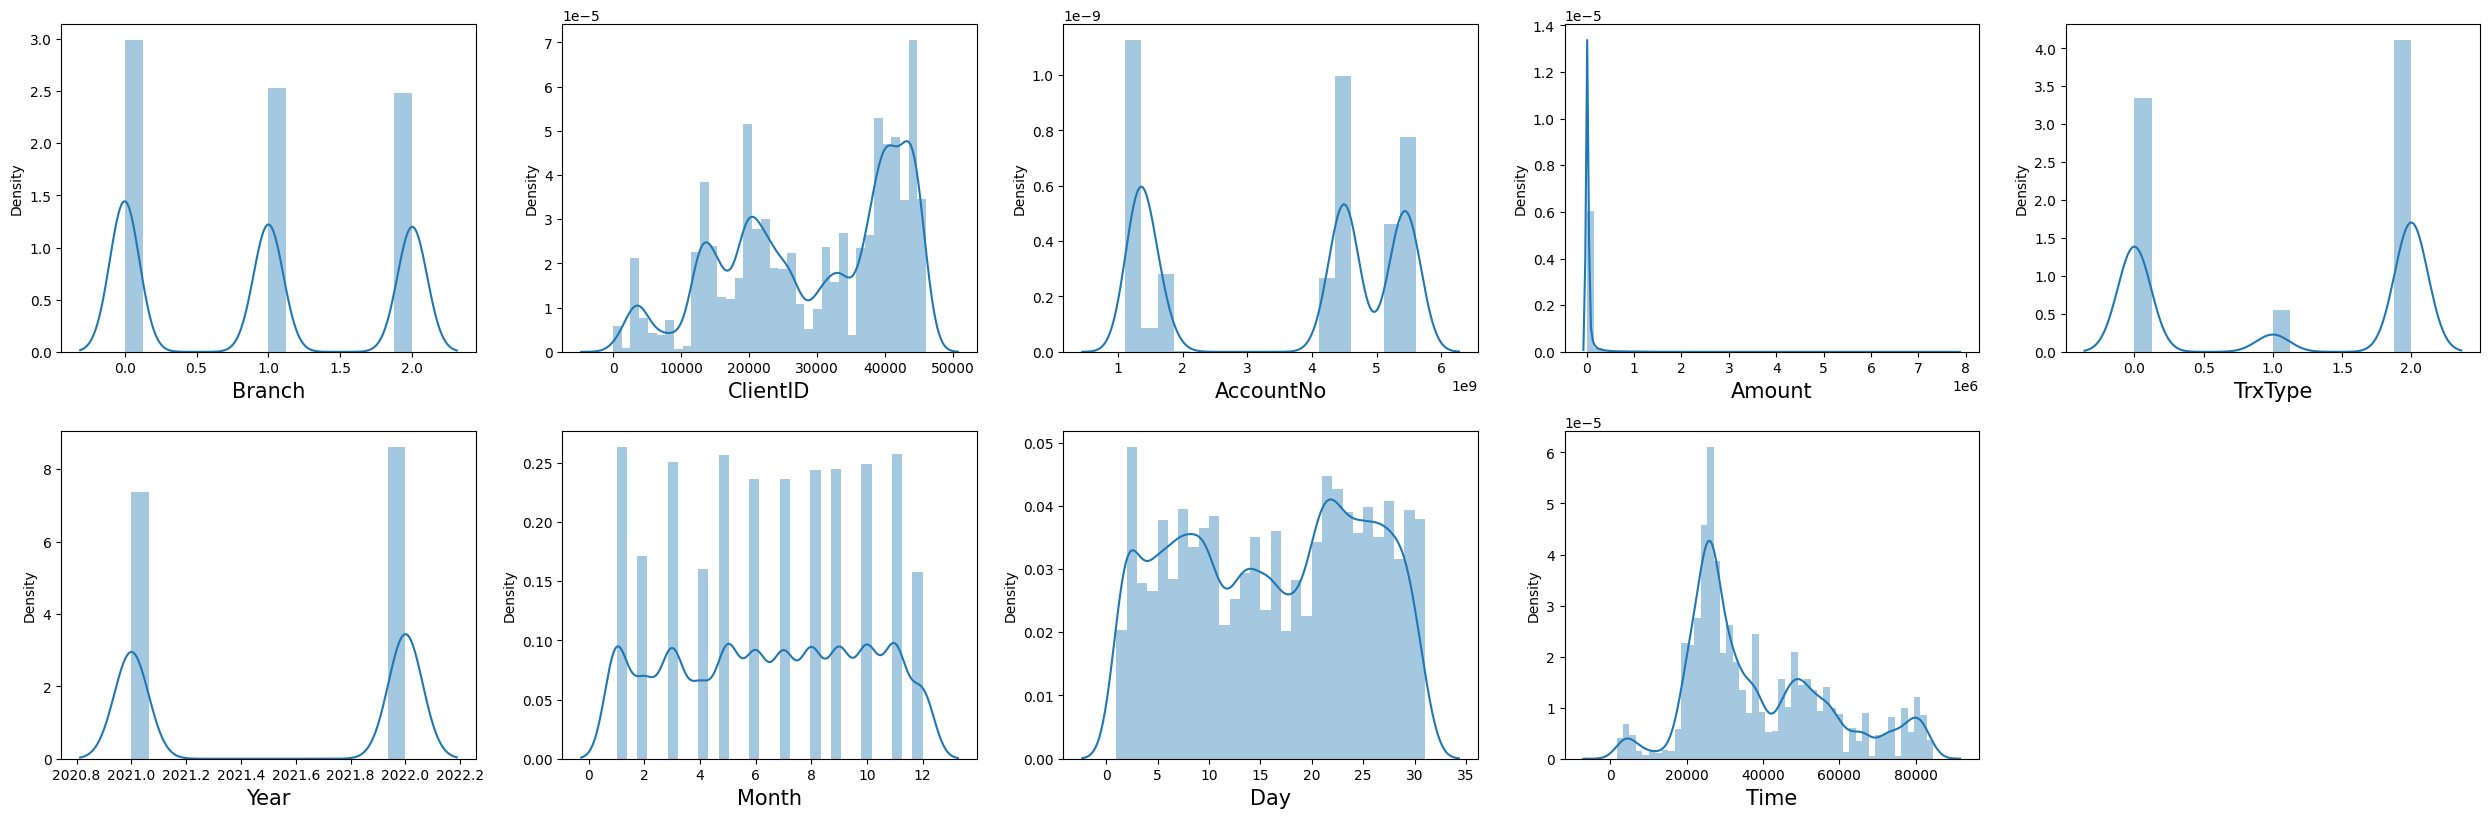

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

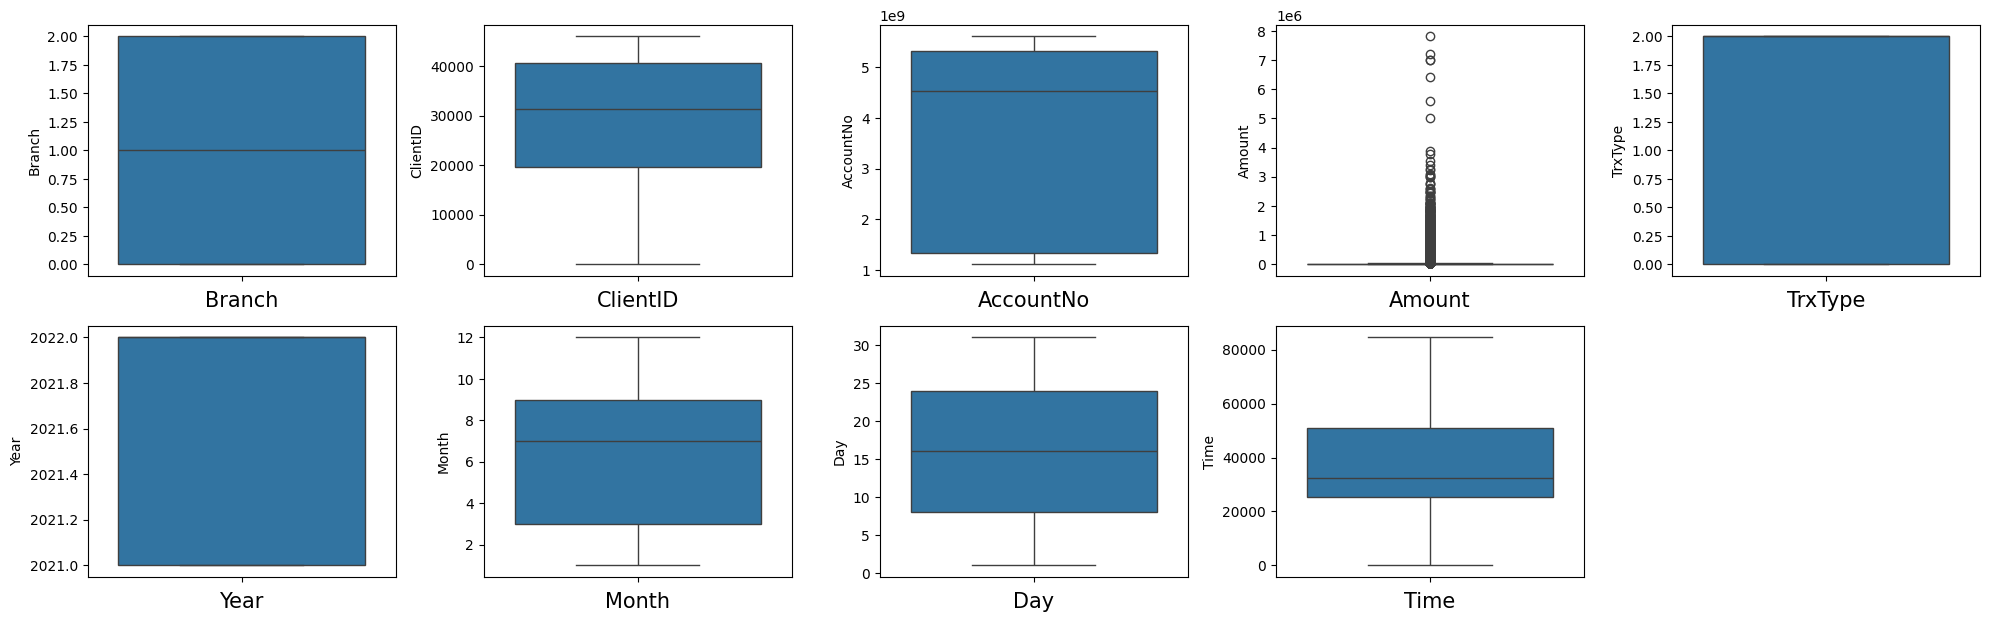

In [ ]:
#Outliers Detection
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

K-MEANS & PCA CLUSTERING

In [ ]:
x = df.iloc[:, [3, 4]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


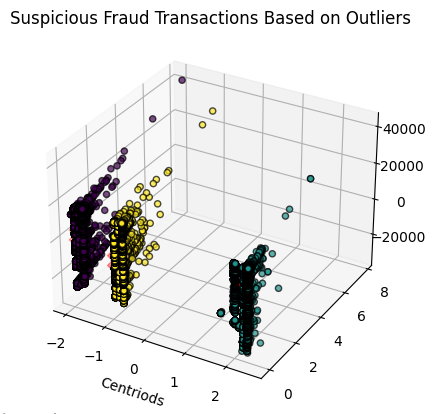

In [ ]:
columns_to_drop = ["Year", "Month", "Day", "Time"]
df_processed = df.drop(columns=columns_to_drop)

# Apply PCA to reduce the processed data to 3 principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_processed.values)

n_clusters = 3

kmeans = KMeans(n_clusters= 3, random_state=42)

kmeans.fit(X_pca)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculate distances of each point to its assigned cluster's centroid
distances = np.zeros_like(labels, dtype=float)
for i in range(n_clusters):
    cluster_points = X_pca[labels == i]
    distances[labels == i] = np.linalg.norm(cluster_points - centroids[i], axis=1)

# Use interquartile range (IQR) method to identify outliers
q1 = np.percentile(distances, 25)
q3 = np.percentile(distances, 75)
iqr = q3 - q1
threshold = q3 + 1.5 * iqr

# Create a binary label where 1 is an outlier and 0 is not an outlier
binary_labels = np.where(distances > threshold, 1, 0)

# Add the binary labels as a new column in the original DataFrame 'df'
df['Class'] = binary_labels


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
centroid_scatter = ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label='Centroids')

ax.set_xlabel('Centriods')
ax.set_title('Suspicious Fraud Transactions Based on Outliers')

plt.show()

In [ ]:
df.head()

,Branch,ClientID,AccountNo,Amount,TrxType,Year,Month,Day,Time,Class
0,0,2,1440000021,390000.00,0,2021,1,28,30540,0
1,0,2,1440000021,113.18,2,2021,2,24,0,0
2,0,21,1310000216,12176.00,2,2021,8,5,20040,0
3,0,1133,1320011331,9290.00,2,2022,8,31,20700,0
4,0,1133,1320011331,7000.00,2,2022,8,31,20700,0


In [ ]:
df.tail()

,Branch,ClientID,AccountNo,Amount,TrxType,Year,Month,Day,Time,Class
32923,2,45910,5370459101,57456.30,2,2022,12,6,59040,0
32924,2,45910,5370459101,4162.45,2,2022,12,6,59040,0
32925,2,45910,5370459101,2155.00,0,2022,12,6,59040,0
32926,2,45930,5470459301,22230.00,2,2022,12,7,53640,0
32927,2,46002,5370460021,15000.00,2,2022,12,16,49140,0


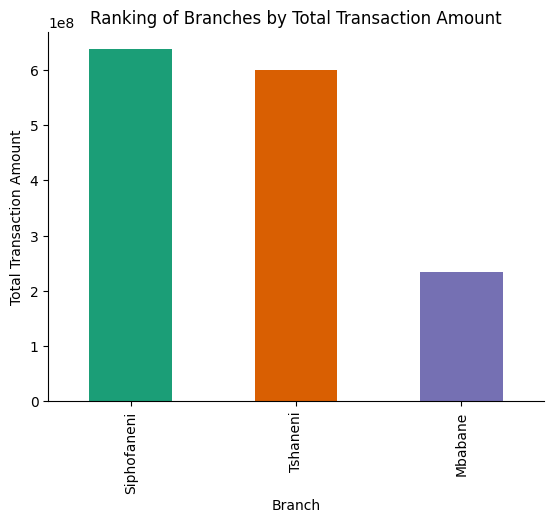

In [ ]:
df1.groupby('Branch')['Amount'].sum().sort_values(ascending=False).plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Total Transaction Amount')
plt.xlabel('Branch')
plt.title('Ranking of Branches by Total Transaction Amount')
plt.show()

In [ ]:
binary_labels_counts = df['Class'].value_counts()

print("Sum of Suspicious_Fraud for 1:", binary_labels_counts.get(1, 0))
print("Sum of Non_Fraud for 0:", binary_labels_counts.get(0, 0))

Sum of Suspicious_Fraud for 1: 2337
Sum of Non_Fraud for 0: 30316


<ipython-input-32-2c0ea71c3f7d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class',data=df, palette="RdYlBu_r")


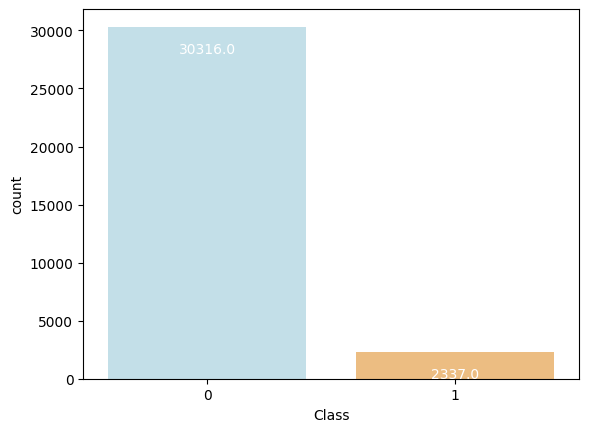

In [ ]:
ax = sns.countplot(x='Class',data=df, palette="RdYlBu_r")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)

plt.show()

Text(0.5, 1.0, 'Correlation')

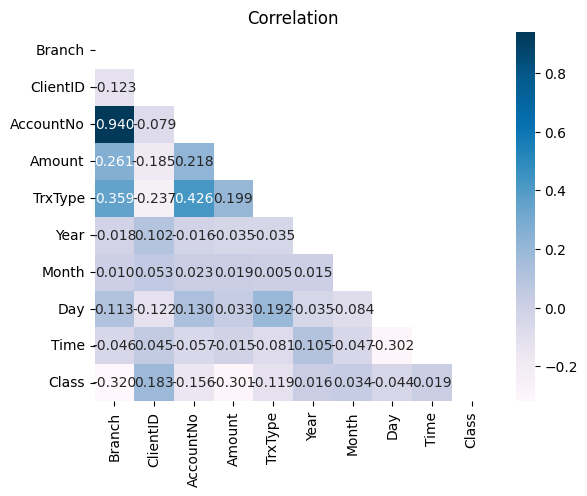

In [ ]:
# checking for correlations
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

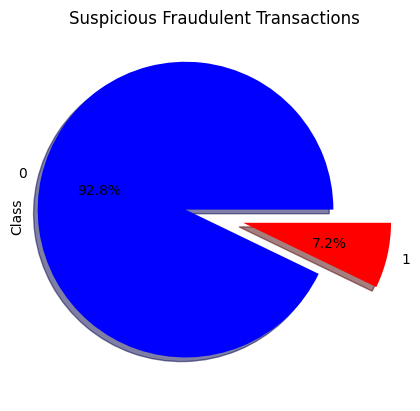

In [ ]:
df["Class"].value_counts().plot.pie(explode=[0.2, 0.2], autopct='%1.1f%%', shadow=True, colors=['blue', 'red'])
plt.title('Suspicious Fraudulent Transactions')
plt.show()

In [ ]:
# setting up separate dataframes for suspicious fraud and non suspicious fraud data analysis and comparison
df4 = df[df["Class"] == 1].reset_index(drop=True)
df5 = df[df["Class"] == 0].reset_index(drop=True)
print("Suspicious Fraud Shape: ", df4.shape)
print("Non-Suspicious Fraud Shape: ", df5.shape)

Suspicious Fraud Shape:  (2337, 10)
Non-Suspicious Fraud Shape:  (30316, 10)


In [ ]:
df4.head()

,Branch,ClientID,AccountNo,Amount,TrxType,Year,Month,Day,Time,Class
0,0,3571,1110035711,335251.44,0,2021,10,5,60660,1
1,0,13103,1610131031,7000.00,2,2022,1,19,48600,1
2,0,13103,1610131031,150.00,2,2022,1,19,48600,1
3,0,13457,1610134578,2020.00,0,2021,2,7,56760,1
4,0,13457,1610134578,1000.00,0,2021,4,16,43200,1


In [ ]:
df5.head()

,Branch,ClientID,AccountNo,Amount,TrxType,Year,Month,Day,Time,Class
0,0,2,1440000021,390000.00,0,2021,1,28,30540,0
1,0,2,1440000021,113.18,2,2021,2,24,0,0
2,0,21,1310000216,12176.00,2,2021,8,5,20040,0
3,0,1133,1320011331,9290.00,2,2022,8,31,20700,0
4,0,1133,1320011331,7000.00,2,2022,8,31,20700,0


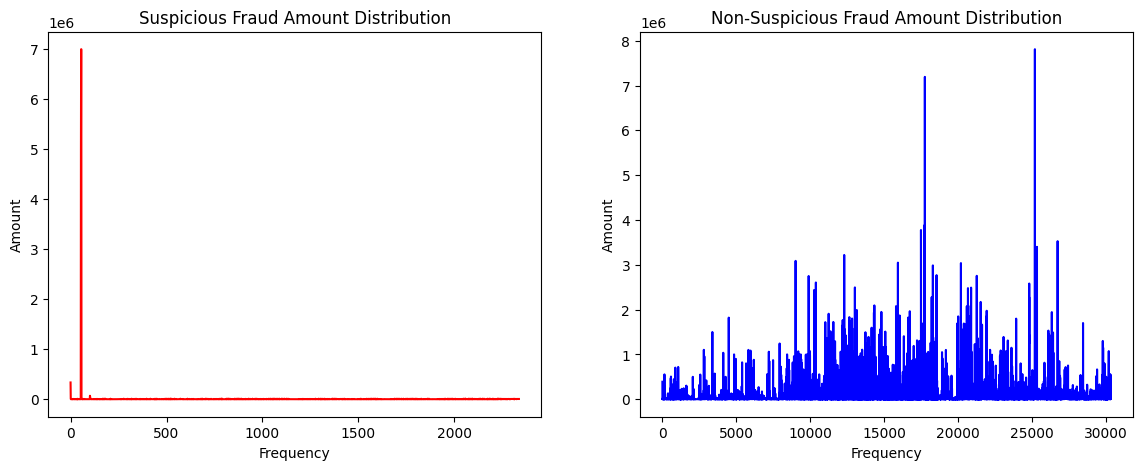

In [ ]:
# Amount distribution comparison

fig = plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(df4["Amount"], color="red")
plt.title("Suspicious Fraud Amount Distribution")
plt.xlabel("Frequency")
plt.ylabel("Amount")

plt.subplot(1, 2, 2)
plt.plot(df5["Amount"], color="blue")
plt.title("Non-Suspicious Fraud Amount Distribution")
plt.xlabel("Frequency")
plt.ylabel("Amount")

plt.show()

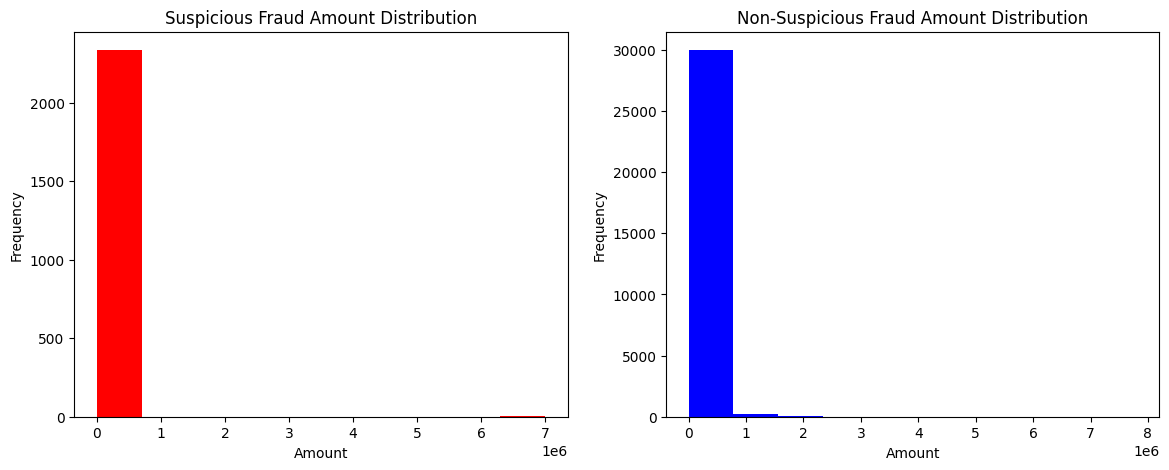

In [ ]:
# Amount distribution comparison (histogram)
fig = plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df4["Amount"], color="red")
plt.title("Suspicious Fraud Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df5["Amount"], color="blue")
plt.title("Non-Suspicious Fraud Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.show()

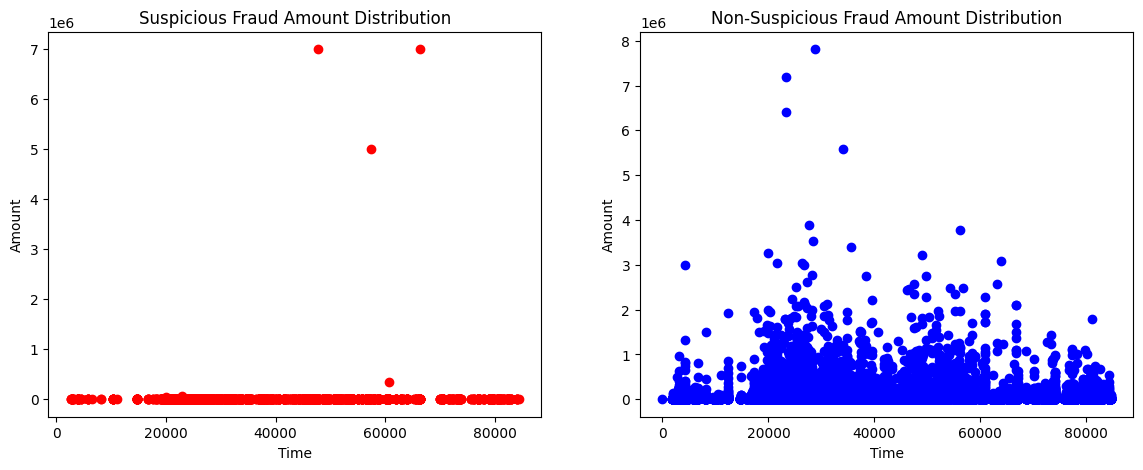

In [ ]:
# Time vs. Amount distribution comparison (scatter plot)

fig = plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(df4["Time"], df4["Amount"], color="red")
plt.title("Suspicious Fraud Amount Distribution")
plt.xlabel("Time")
plt.ylabel("Amount")

plt.subplot(1, 2, 2)
plt.scatter(df5["Time"], df5["Amount"], color="blue")
plt.title("Non-Suspicious Fraud Amount Distribution")
plt.xlabel("Time")
plt.ylabel("Amount")

plt.show()

**Unsupervised Machine Learning for Anomaly Detection**

In [ ]:
# Since the dataset is too large, taking a sample from that data to train models
sampled_data = df.sample(frac=0.1, random_state=42)

print("Sampled Fraud Data Shape:", sampled_data.shape)
print("Target Variable Value Count: ")
print(sampled_data["Class"].value_counts())

Sampled Fraud Data Shape: (3265, 10)
Target Variable Value Count: 
0    3038
1     227
Name: Class, dtype: int64


In [ ]:
# splitting data into X and y

X = sampled_data.drop("Class", axis=1)
y = sampled_data["Class"]

print("X Shape: ", X.shape)
print("y Shape: ", y.shape)
print("                                                        ")
print("Target Variable Value Count: ")
print("Normal Class: ", (y == 0).sum())
print("Fraud Class: ", (y == 1).sum())

Suspicious_fraud = sampled_data[sampled_data["Class"] == 1]
non_Suspicious_fraud = sampled_data[sampled_data["Class"] == 0]

outlier_fraction = len(Suspicious_fraud) / float(len(non_Suspicious_fraud))
print("                                                   ")
print("Suspicious Fraud Fraction: ", outlier_fraction)

X Shape:  (3265, 9)
y Shape:  (3265,)
                                                        
Target Variable Value Count: 
Normal Class:  3038
Fraud Class:  227
                                                   
Suspicious Fraud Fraction:  0.07472021066491112


In [ ]:
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, y)
feature_ranking = rfe.ranking_

# Output the feature rankings
print("Feature Rankings:")
for feature, rank in zip(X.columns, feature_ranking):
    print(f"{feature}: {rank}")

feature_ranking_dict = dict(zip(X.columns, feature_ranking))
print("\nFeature Rankings (as dictionary):")
print(feature_ranking_dict)

Feature Rankings:
Branch: 3
ClientID: 4
AccountNo: 1
Amount: 2
TrxType: 6
Year: 9
Month: 8
Day: 7
Time: 5

Feature Rankings (as dictionary):
{'Branch': 3, 'ClientID': 4, 'AccountNo': 1, 'Amount': 2, 'TrxType': 6, 'Year': 9, 'Month': 8, 'Day': 7, 'Time': 5}


## Isolation Forest (Outlier Detection)

In [ ]:
from sklearn.metrics import (confusion_matrix, roc_curve, classification_report, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Predicted Anomalous Data Points:  244
Predicted Non Anomalous Data Points:  3021
                                                        
Number of misclassified data points:  439

Accuracy Score : 0.8655436447166922

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3038
           1       0.07      0.07      0.07       227

    accuracy                           0.87      3265
   macro avg       0.50      0.50      0.50      3265
weighted avg       0.87      0.87      0.87      3265

Model Precision: 0.07
Model Recall: 0.07
Model F1-Score: 0.07
Model ROC: 0.5 

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3021
           1       0.07      0.07      0.07       244

    accuracy                           0.87      3265
   macro avg       0.50      0.50      0.50      3265
weighted avg       0.86      0.87      0.86      3265
 



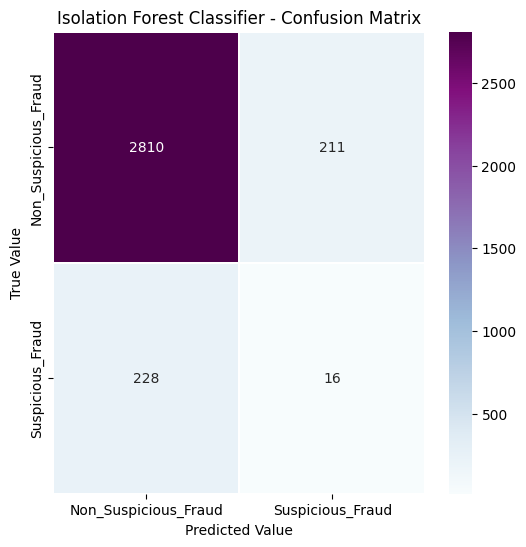

In [ ]:
clf = IsolationForest(n_estimators=100, max_samples=len(X), random_state=42, contamination=outlier_fraction)

clf.fit(X)
y_pred = clf.predict(X)

print("Predicted Anomalous Data Points: ", len(y_pred[y_pred == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred[y_pred == 1]))
print("                                                        ")

# replacing -1 by 1 and 1 by 0
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

# evaluation
print("Number of misclassified data points: ", (y_pred != y).sum())
print("\nAccuracy Score :", accuracy_score(y, y_pred))

print("\nClassification Report: ")
print(classification_report(y, y_pred))


print("Model Precision:", round(precision_score(y_pred , y),2))
print("Model Recall:", round(recall_score(y_pred , y),2))
print("Model F1-Score:", round(f1_score(y_pred , y),2))
print("Model ROC:", round(roc_auc_score(y_pred , y),2) , '\n')


conf_matrix=confusion_matrix(y_pred,y)
labels= ['Non_Suspicious_Fraud', 'Suspicious_Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_pred , y) , '\n')

plt.title("Isolation Forest Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [ ]:
# adding the predicted y to the sampled dataset
sampled_data["y_pred"] = y_pred

print(sampled_data["y_pred"].value_counts())

0    3021
1     244
Name: y_pred, dtype: int64


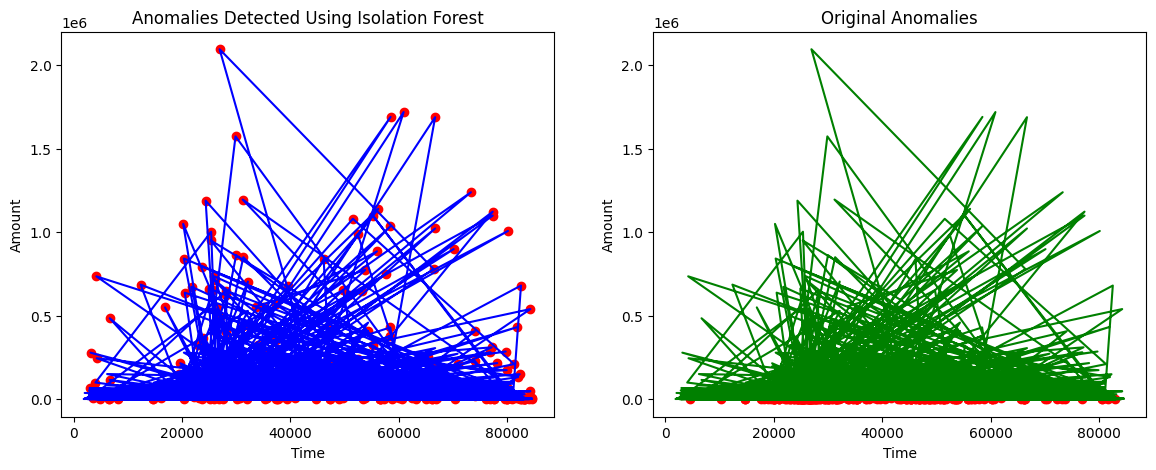

In [ ]:
# plotting normal and fraud data points

fig = plt.figure(figsize=(14, 5))

# Isolation Forest Plot
plt.subplot(1, 2, 1)
anomaly_df = sampled_data.loc[sampled_data["y_pred"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="blue")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Anomalies Detected Using Isolation Forest")
plt.xlabel("Time")
plt.ylabel("Amount")

# Original data plot
plt.subplot(1, 2, 2)
anomaly_df = sampled_data.loc[sampled_data["Class"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="green")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Original Anomalies")
plt.xlabel("Time")
plt.ylabel("Amount")

plt.show()

## Local Outlier Factor (Outlier Detection)

Predicted Anomalous Data Points:  244
Predicted Non Anomalous Data Points:  3021
                                                                
Number of misclassified data points:  451

Accuracy Score : 0.8618683001531393

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3038
           1       0.04      0.04      0.04       227

    accuracy                           0.86      3265
   macro avg       0.48      0.48      0.48      3265
weighted avg       0.87      0.86      0.86      3265

Model Precision: 0.04
Model Recall: 0.04
Model F1-Score: 0.04
Model ROC: 0.48 

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3021
           1       0.04      0.04      0.04       244

    accuracy                           0.86      3265
   macro avg       0.48      0.48      0.48      3265
weighted avg       0.86      0.86      0.86      3265
 



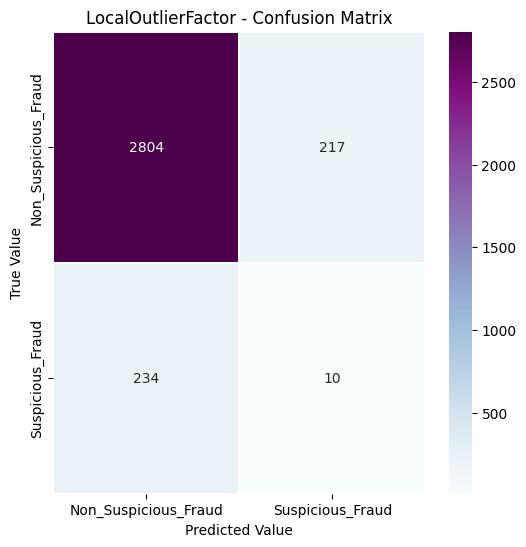

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=20,
    algorithm="auto",
    leaf_size=30,
    metric="minkowski",
    p=2,
    metric_params=None,
    contamination=outlier_fraction,
)

y_pred_lof = lof.fit_predict(X)

print("Predicted Anomalous Data Points: ", len(y_pred_lof[y_pred_lof == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred_lof[y_pred_lof == 1]))
print("                                                                ")

# replacing -1 by 1 and 1 by 0
y_pred_lof[y_pred_lof == 1] = 0
y_pred_lof[y_pred_lof == -1] = 1

# evaluation
print("Number of misclassified data points: ", (y_pred_lof != y).sum())
print("\nAccuracy Score :", accuracy_score(y, y_pred_lof))

print("\nClassification Report: ")
print(classification_report(y, y_pred_lof))

print("Model Precision:", round(precision_score(y_pred_lof , y),2))
print("Model Recall:", round(recall_score(y_pred_lof , y),2))
print("Model F1-Score:", round(f1_score(y_pred_lof , y),2))
print("Model ROC:", round(roc_auc_score(y_pred_lof , y),2) , '\n')


conf_matrix=confusion_matrix(y_pred_lof,y)
labels= ['Non_Suspicious_Fraud', 'Suspicious_Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_pred_lof , y) , '\n')

plt.title("LocalOutlierFactor - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [ ]:
# adding the predicted y to the sampled dataset
sampled_data["y_pred_lof"] = y_pred_lof
print(sampled_data["y_pred_lof"].value_counts())

0    3021
1     244
Name: y_pred_lof, dtype: int64


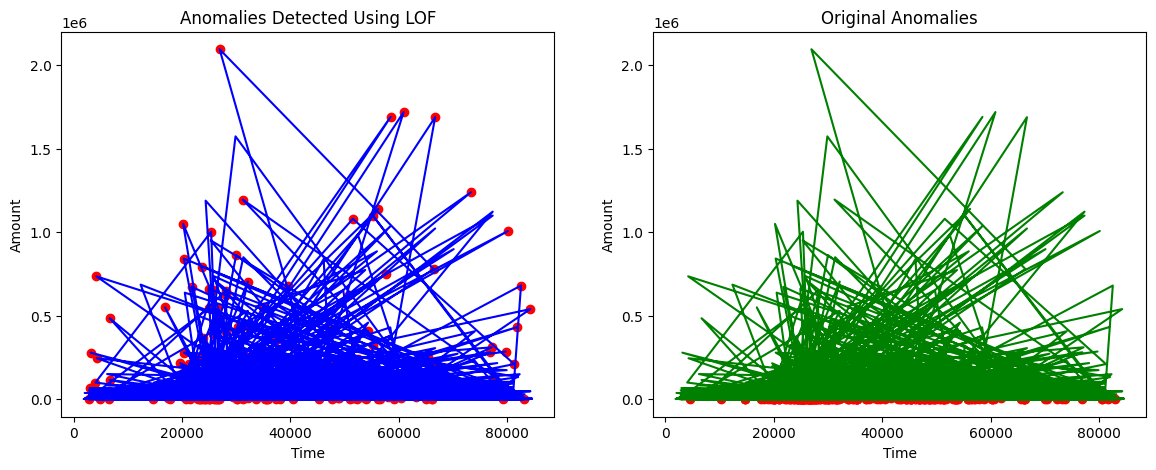

In [ ]:
# plotting normal and fraud data points

fig = plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
anomaly_df = sampled_data.loc[sampled_data["y_pred_lof"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="blue")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Anomalies Detected Using LOF")
plt.xlabel("Time")
plt.ylabel("Amount")

plt.subplot(1, 2, 2)
anomaly_df = sampled_data.loc[sampled_data["Class"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="green")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Original Anomalies")
plt.xlabel("Time")
plt.ylabel("Amount")

plt.show()

**Handling Imbalanced Dataset**

In [ ]:
# creating a smaller sample for handling imbalanced dataset.

df6 = df[df["Class"] == 0].sample(2337)
df7 = df[df["Class"] == 1]
dl_sample_data = df6.append(df7).reset_index(drop=True)

print("Target Variable Value Counts: ")
print(dl_sample_data["Class"].value_counts())

Target Variable Value Counts: 
0    2337
1    2337
Name: Class, dtype: int64


<ipython-input-51-5a384d3fcb44>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dl_sample_data = df6.append(df7).reset_index(drop=True)


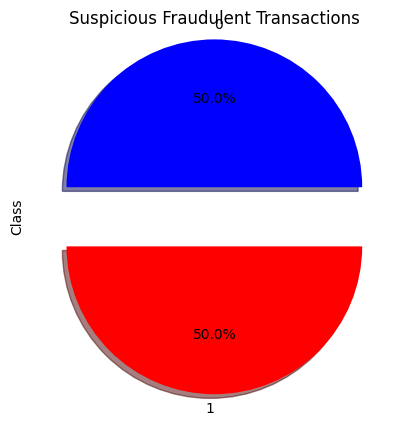

In [ ]:
dl_sample_data["Class"].value_counts().plot.pie(explode=[0.2, 0.2], autopct='%1.1f%%', shadow=True, colors=['blue', 'red'])
plt.title('Suspicious Fraudulent Transactions')
plt.show()

In [ ]:
# splitting the data

X = dl_sample_data.drop("Class", axis=1)
y = dl_sample_data["Class"]

print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

X Shape:  (4674, 9)
y Shape:  (4674,)


**Visualize the data with t-SNE**

In [ ]:
def dimensionality_plot(X, y):

    #     sns.set(style='whitegrid', palette='muted')

    # Initializing TSNE object with 2 principal components
    tsne = TSNE(n_components=2, random_state=42)

    # Fitting the data
    X_trans = tsne.fit_transform(X)

    plt.figure(figsize=(10, 6))

    plt.scatter(
        X_trans[np.where(y == 0), 0],
        X_trans[np.where(y == 0), 1],
        marker="o",
        color="b",
        linewidth=1,
        alpha=0.8,
        label="Non Suspicious Fraud",
    )

    plt.scatter(
        X_trans[np.where(y == 1), 0],
        X_trans[np.where(y == 1), 1],
        marker="o",
        color="r",
        linewidth=1,
        alpha=0.8,
        label="Suspicious Fraud",
    )

    plt.legend(loc="best")

    plt.show()

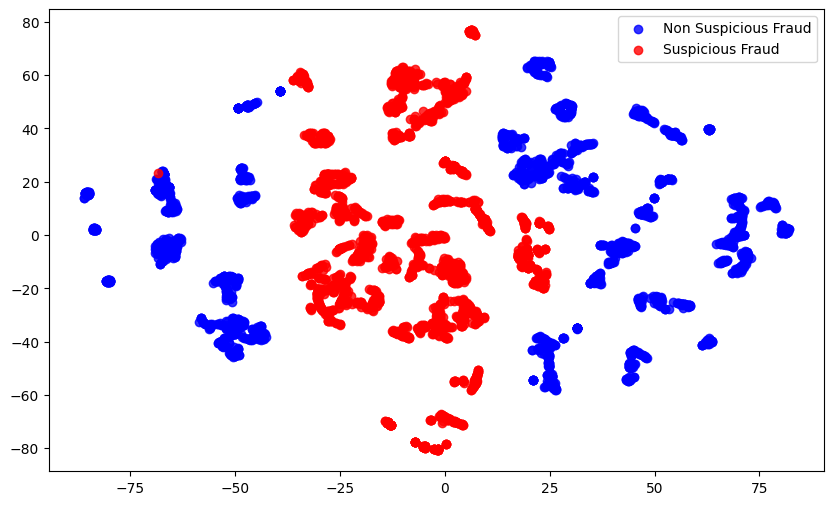

In [ ]:
# plotting the dimensionality_plot for original data

dimensionality_plot(X, y)

**DEEP LEARNING TECHNIQUES**

In [ ]:
# scaling the data

scaler = StandardScaler().fit_transform(X)

# scaled data
X_scaled_normal = scaler[y == 0]
X_scaled_fraud = scaler[y == 1]

In [ ]:
# setting up the input shape (equal to number of features)
input_layer = Input(shape=(X.shape[1],))

# building the encoder network
encoded = Dense(100, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    input_layer
)
encoded = Dense(50, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    encoded
)
encoded = Dense(25, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    encoded
)
encoded = Dense(12, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    encoded
)
encoded = Dense(6, activation="relu")(encoded)

# building the decoder network
decoded = Dense(12, activation="tanh")(encoded)
decoded = Dense(25, activation="tanh")(decoded)
decoded = Dense(50, activation="tanh")(decoded)
decoded = Dense(100, activation="tanh")(decoded)

output_layer = Dense(X.shape[1], activation="sigmoid")(decoded)

# creating the model
autoencoder = Model(input_layer, output_layer)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 12)                312       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 12)                84    

In [ ]:
# compiling the auto encoder model
autoencoder.compile(optimizer="adam", loss="mse")

history = autoencoder.fit(
    X_scaled_normal,
    X_scaled_normal,
    batch_size=32,
    epochs=50,
    shuffle=True,
    validation_split=0.20,
)

Epoch 1/50
59/59 [==============================] - 3s 9ms/step - loss: 0.9814 - val_loss: 0.8195
Epoch 2/50
59/59 [==============================] - 0s 4ms/step - loss: 0.7801 - val_loss: 0.7608
Epoch 3/50
59/59 [==============================] - 0s 4ms/step - loss: 0.7455 - val_loss: 0.7377
Epoch 4/50
59/59 [==============================] - 0s 4ms/step - loss: 0.7301 - val_loss: 0.7279
Epoch 5/50
59/59 [==============================] - 0s 3ms/step - loss: 0.7222 - val_loss: 0.7191
Epoch 6/50
59/59 [==============================] - 0s 4ms/step - loss: 0.7147 - val_loss: 0.7136
Epoch 7/50
59/59 [==============================] - 0s 4ms/step - loss: 0.7085 - val_loss: 0.7112
Epoch 8/50
59/59 [==============================] - 0s 4ms/step - loss: 0.7054 - val_loss: 0.7066
Epoch 9/50
59/59 [==============================] - 0s 4ms/step - loss: 0.7013 - val_loss: 0.7039
Epoch 10/50
59/59 [==============================] - 0s 4ms/step - loss: 0.6980 - val_loss: 0.7011
Epoch 11/50
59/59 [

Text(0.5, 1.0, 'Loss Curves')

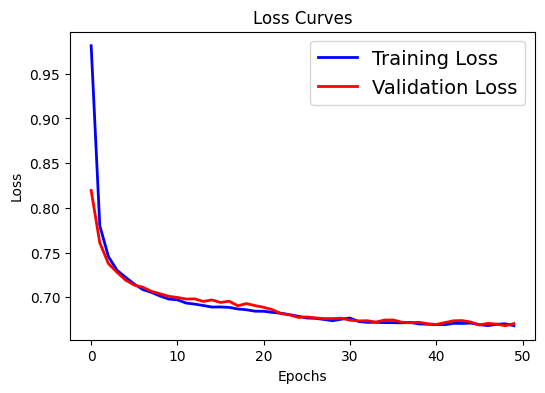

In [ ]:
# Loss curve

plt.figure(figsize=[6, 4])
plt.plot(history.history["loss"], "blue", linewidth=2.0)
plt.plot(history.history["val_loss"], "red", linewidth=2.0)
plt.legend(["Training Loss", "Validation Loss"], fontsize=14)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.title("Loss Curves", fontsize=12)

In [ ]:
# creating the sequential model and adding the trainined weights till the fifth layer (till where the latent representation exists)
latent_model = Sequential()
latent_model.add(autoencoder.layers[0])
latent_model.add(autoencoder.layers[1])
latent_model.add(autoencoder.layers[2])
latent_model.add(autoencoder.layers[3])
latent_model.add(autoencoder.layers[4])

In [ ]:
# generating the hidden representation of the 2 classes

normal_datapoints = latent_model.predict(X_scaled_normal)
fraud_datapoints = latent_model.predict(X_scaled_fraud)

# creating a dataframe of latent representation of the data
encoded_X = np.append(normal_datapoints, fraud_datapoints, axis=0)

y_normal = np.zeros(normal_datapoints.shape[0])
y_fraud = np.ones(fraud_datapoints.shape[0])
encoded_y = np.append(y_normal, y_fraud, axis=0)

74/74 [==============================] - 0s 1ms/step


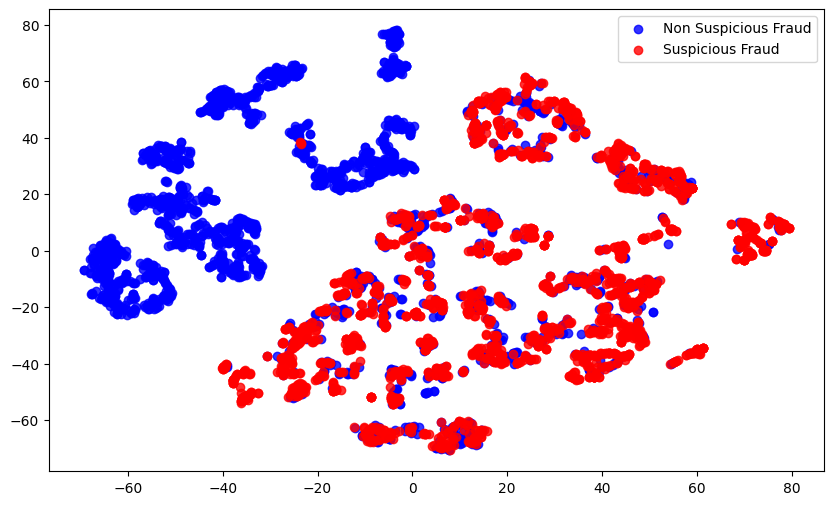

In [ ]:
# plotting the TSNE function again to visualize the latent data
dimensionality_plot(encoded_X, encoded_y)

**Supervised Machine Learning Techniques for Anomaly Detection**

In [ ]:
# splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# splitting the encoded data
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(
    encoded_X, encoded_y, test_size=0.2
)

print(
    f"Encoded train data X: {X_enc_train.shape}, Y: {y_enc_train.shape}, X_test :{X_enc_test.shape}, Y_test: {y_enc_test.shape}"
)
print(
    f"Actual train & test data X: {X_train.shape}, Y: {X_train.shape}, X_test :{X_test.shape}, Y_test: {y_test.shape}"
)

Encoded train data X: (3739, 12), Y: (3739,), X_test :(935, 12), Y_test: (935,)
Actual train & test data X: (3505, 9), Y: (3505, 9), X_test :(1169, 9), Y_test: (1169,)


**Support Vector Classifier**

Accuracy of Support Vector Classifierr 0.85
                                                                 
ROC-AUC Score of Support Vector Classifier: 0.95
                                                                  
Average Precision-Recall Score of Support Vector Classifier: 0.94
                                                                 

Support Vector Classifier Classification report 
               precision    recall  f1-score   support

         0.0       0.99      0.71      0.83       459
         1.0       0.78      1.00      0.87       476

    accuracy                           0.85       935
   macro avg       0.89      0.85      0.85       935
weighted avg       0.88      0.85      0.85       935

              precision    recall  f1-score   support

         0.0       0.99      0.71      0.83       459
         1.0       0.78      1.00      0.87       476

    accuracy                           0.85       935
   macro avg       0.89      0.85      0.85   

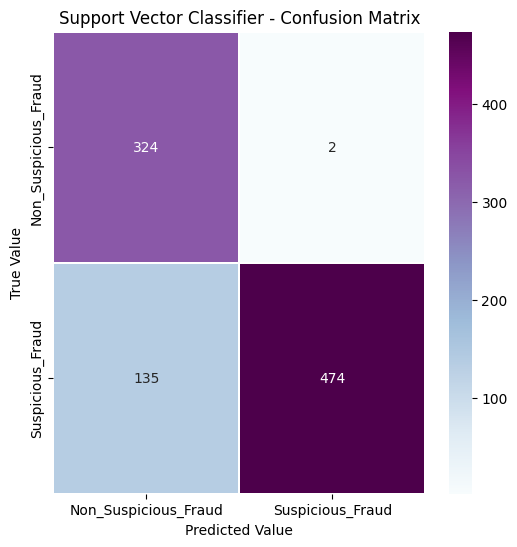

In [ ]:
# applying support vector classifier on the encoded data

svc_clf = SVC(probability=True)

svc_clf.fit(X_enc_train, y_enc_train)
svc_predictions = svc_clf.predict(X_enc_test)
y_proba = svc_clf.predict_proba(X_enc_test)[:, 1]
average_precision = average_precision_score(y_enc_test, y_proba)

print("Accuracy of Support Vector Classifierr {:.2f}".format(accuracy_score(y_enc_test, svc_predictions)))
print("                                                                 ")

print(f"ROC-AUC Score of Support Vector Classifier: {roc_auc_score(y_enc_test, y_proba):.2f}")
print("                                                                  ")

print(f"Average Precision-Recall Score of Support Vector Classifier: {average_precision:.2f}")
print("                                                                 ")

print(
    "\nSupport Vector Classifier Classification report \n {0}".format(
        classification_report(y_enc_test, svc_predictions)
    )

)

conf_matrix=confusion_matrix(svc_predictions,y_enc_test)
labels= ['Non_Suspicious_Fraud', 'Suspicious_Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_enc_test, svc_predictions) , '\n')

plt.title("Support Vector Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()


**RandomForestClassifier**

Accuracy score of Random Forest : 0.90
                                                          
ROC-AUC Score of Random Forest: 0.97
                                                           
Average Precision-Recall Score: 0.97
                                                            

Random Forest Classification report 
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.90       459
         1.0       0.88      0.94      0.91       476

    accuracy                           0.90       935
   macro avg       0.90      0.90      0.90       935
weighted avg       0.90      0.90      0.90       935

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.90       459
         1.0       0.88      0.94      0.91       476

    accuracy                           0.90       935
   macro avg       0.90      0.90      0.90       935
weighted avg       0.90      0.90      0.90       935
 



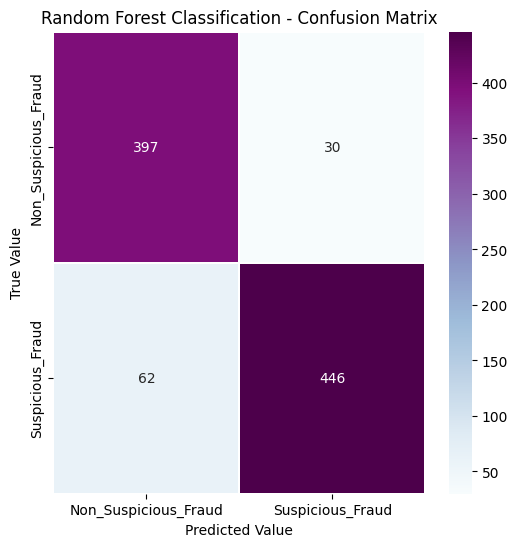

In [ ]:
# applying RandomForestClassifier on the encoded data

rf_clf = RandomForestClassifier()

rf_clf.fit(X_enc_train, y_enc_train)
predictions = rf_clf.predict(X_enc_test)
y_proba = rf_clf.predict_proba(X_enc_test)[:, 1]
average_precision = average_precision_score(y_enc_test, y_proba)

print("Accuracy score of Random Forest : {:.2f}".format(accuracy_score(y_enc_test, predictions)))
print("                                                          ")

print(f"ROC-AUC Score of Random Forest: {roc_auc_score(y_enc_test, y_proba):.2f}")
print("                                                           ")

print(f"Average Precision-Recall Score: {average_precision:.2f}")
print("                                                            ")

print(
    "\nRandom Forest Classification report \n {0}".format(
        classification_report(y_enc_test, predictions)
    )
)

conf_matrix=confusion_matrix(predictions,y_enc_test)
labels= ['Non_Suspicious_Fraud', 'Suspicious_Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_enc_test, predictions) , '\n')

plt.title("Random Forest Classification - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()


**Logistic Regression**

Accuracy score of logistic regression : 0.85
                                                          
ROC-AUC Score of logistic regression: 0.91
                                                           
Average Precision-Recall Score of logistic regression: 0.89
                                                            

logistic regression Classification report 
               precision    recall  f1-score   support

         0.0       0.93      0.75      0.83       459
         1.0       0.79      0.95      0.86       476

    accuracy                           0.85       935
   macro avg       0.86      0.85      0.85       935
weighted avg       0.86      0.85      0.85       935

              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83       459
         1.0       0.79      0.95      0.86       476

    accuracy                           0.85       935
   macro avg       0.86      0.85      0.85       935
weighted avg       0.86     

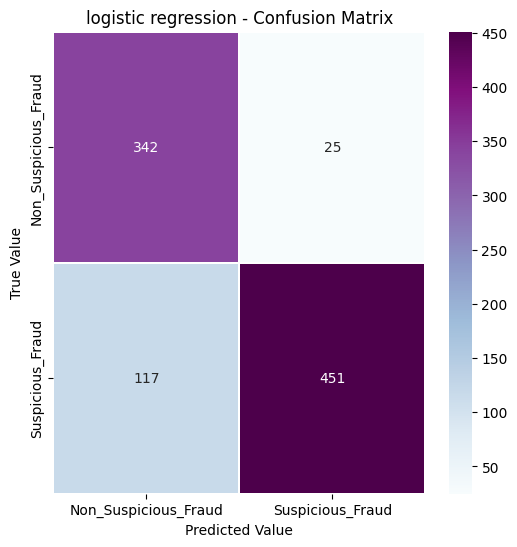

In [ ]:
# applying logistic regression model on the encoded data

lr_clf = LogisticRegression()

lr_clf.fit(X_enc_train, y_enc_train)
lr_predictions = lr_clf.predict(X_enc_test)
y_proba = lr_clf.predict_proba(X_enc_test)[:, 1]
average_precision = average_precision_score(y_enc_test, y_proba)

print("Accuracy score of logistic regression : {:.2f}".format(accuracy_score(y_enc_test, lr_predictions)))
print("                                                          ")

print(f"ROC-AUC Score of logistic regression: {roc_auc_score(y_enc_test, y_proba):.2f}")
print("                                                           ")

print(f"Average Precision-Recall Score of logistic regression: {average_precision:.2f}")
print("                                                            ")

print(
    "\nlogistic regression Classification report \n {0}".format(
        classification_report(y_enc_test, lr_predictions)


    )
)
conf_matrix=confusion_matrix(lr_predictions,y_enc_test)
labels= ['Non_Suspicious_Fraud', 'Suspicious_Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_enc_test, lr_predictions) , '\n')

plt.title("logistic regression - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()


**LGBM Classifier**

[LightGBM] [Info] Number of positive: 1861, number of negative: 1878
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 3739, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497727 -> initscore=-0.009093
[LightGBM] [Info] Start training from score -0.009093
Accuracy score of LGBMClassifier : 0.91
                                                          
ROC-AUC Score of LGBMClassifier: 0.97
                                                           
Average Precision-Recall Score of LGBMClassifier: 0.96
                                                            

LGBMClassifier Classification report 
               precision    recall  f1-score   support

         0.0       0.95      0.87      0.90       459
         1.0       0.88      0.95      0.92    

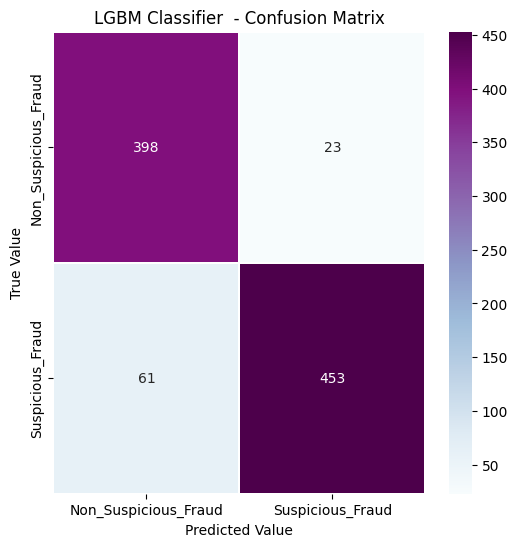

In [ ]:
# Applying LGBMClassifier model on the encoded data
lgbm_clf = LGBMClassifier()

lgbm_clf.fit(X_enc_train, y_enc_train)
lgbm_predictions = lgbm_clf.predict(X_enc_test)
y_proba = lgbm_clf.predict_proba(X_enc_test)[:, 1]
average_precision = average_precision_score(y_enc_test, y_proba)

print("Accuracy score of LGBMClassifier : {:.2f}".format(accuracy_score(y_enc_test, lgbm_predictions)))
print("                                                          ")

print(f"ROC-AUC Score of LGBMClassifier: {roc_auc_score(y_enc_test, y_proba):.2f}")
print("                                                           ")

print(f"Average Precision-Recall Score of LGBMClassifier: {average_precision:.2f}")
print("                                                            ")

print(
    "\nLGBMClassifier Classification report \n {0}".format(
        classification_report(y_enc_test, lgbm_predictions)
    )
)

conf_matrix=confusion_matrix(lgbm_predictions,y_enc_test)
labels= ['Non_Suspicious_Fraud', 'Suspicious_Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_enc_test, lgbm_predictions) , '\n')

plt.title("LGBM Classifier  - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()


**AdaBoost Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy score of AdaBoost Classifier: 0.82
                                                          
ROC-AUC Score of AdaBoost Classifier: 0.86
                                                           
Average Precision-Recall Score of AdaBoost Classifier: 0.77
                                                            

AdaBoost Classifier Classification report 
               precision    recall  f1-score   support

         0.0       0.89      0.72      0.80       459
         1.0       0.77      0.92      0.84       476

    accuracy                           0.82       935
   macro avg       0.83      0.82      0.82       935
weighted avg       0.83      0.82      0.82       935

              precision    recall  f1-score   support

         0.0       0.89      0.72      0.80       459
         1.0       0.77      0.92      0.84       476

    accuracy                           0.82       935
   macro avg       0.83      0.82      0.82       935
weighted avg       0.83      

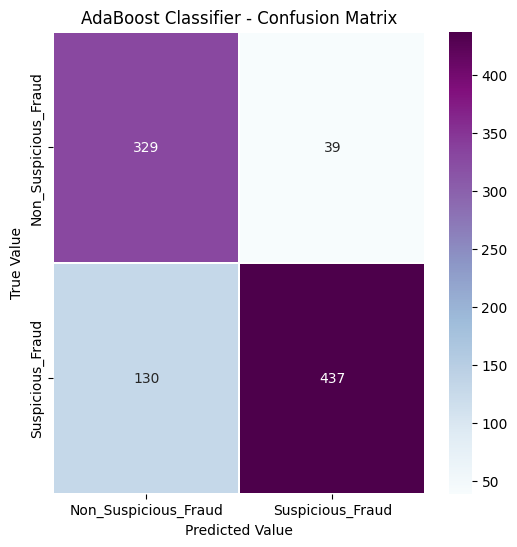

In [ ]:
# Applying AdaBoostClassifier model on the encoded data

adaboost_clf = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=42)

adaboost_clf.fit(X_enc_train, y_enc_train)
adaboost_predictions = adaboost_clf.predict(X_enc_test)
y_proba = adaboost_clf.predict_proba(X_enc_test)[:, 1]
average_precision = average_precision_score(y_enc_test, y_proba)

print("Accuracy score of AdaBoost Classifier: {:.2f}".format(accuracy_score(y_enc_test, adaboost_predictions)))
print("                                                          ")

print(f"ROC-AUC Score of AdaBoost Classifier: {roc_auc_score(y_enc_test, y_proba):.2f}")
print("                                                           ")

print(f"Average Precision-Recall Score of AdaBoost Classifier: {average_precision:.2f}")
print("                                                            ")

print(
    "\nAdaBoost Classifier Classification report \n {0}".format(
        classification_report(y_enc_test, adaboost_predictions)
    )
)

conf_matrix=confusion_matrix(adaboost_predictions,y_enc_test)
labels= ['Non_Suspicious_Fraud', 'Suspicious_Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_enc_test, adaboost_predictions) , '\n')

plt.title("AdaBoost Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

**XGB Classifier**

Accuracy score of XGB Classifier: 0.91
                                                          
ROC-AUC Score of XGB Classifier: 0.97
                                                           
Average Precision-Recall Score of XGB Classifier: 0.97
                                                            

XGB Classifier Classification report 
               precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       459
         1.0       0.90      0.93      0.92       476

    accuracy                           0.91       935
   macro avg       0.91      0.91      0.91       935
weighted avg       0.91      0.91      0.91       935

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       459
         1.0       0.90      0.93      0.92       476

    accuracy                           0.91       935
   macro avg       0.91      0.91      0.91       935
weighted avg       0.91      0.91      0.91      

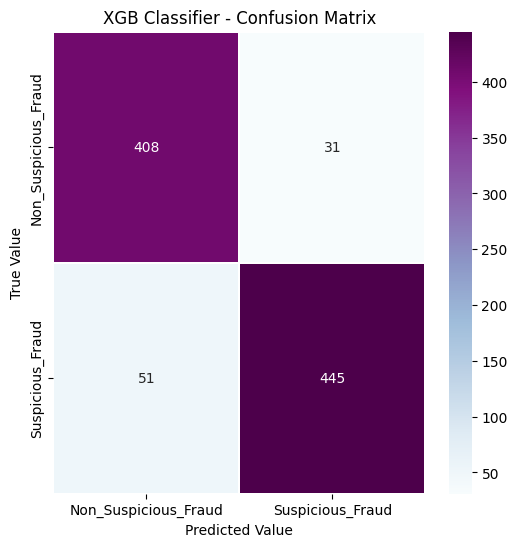

In [ ]:
# Applying XGBClassifier model on the encoded data

xgb_clf = XGBClassifier()

xgb_clf.fit(X_enc_train, y_enc_train)
xgb_predictions = xgb_clf.predict(X_enc_test)
y_proba = xgb_clf.predict_proba(X_enc_test)[:, 1]
average_precision = average_precision_score(y_enc_test, y_proba)

print("Accuracy score of XGB Classifier: {:.2f}".format(accuracy_score(y_enc_test, xgb_predictions)))
print("                                                          ")

print(f"ROC-AUC Score of XGB Classifier: {roc_auc_score(y_enc_test, y_proba):.2f}")
print("                                                           ")

print(f"Average Precision-Recall Score of XGB Classifier: {average_precision:.2f}")
print("                                                            ")

print(
    "\nXGB Classifier Classification report \n {0}".format(
        classification_report(y_enc_test, xgb_predictions)
    )
)

conf_matrix=confusion_matrix(xgb_predictions,y_enc_test)
labels= ['Non_Suspicious_Fraud', 'Suspicious_Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_enc_test, xgb_predictions) , '\n')

plt.title("XGB Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

**CatBoost Classifier**

Learning rate set to 0.018093
0:	learn: 0.6752344	total: 58.4ms	remaining: 58.3s
1:	learn: 0.6572705	total: 73.8ms	remaining: 36.8s
2:	learn: 0.6399642	total: 82.7ms	remaining: 27.5s
3:	learn: 0.6229155	total: 92.4ms	remaining: 23s
4:	learn: 0.6062337	total: 108ms	remaining: 21.5s
5:	learn: 0.5928512	total: 130ms	remaining: 21.5s
6:	learn: 0.5807850	total: 137ms	remaining: 19.4s
7:	learn: 0.5679861	total: 142ms	remaining: 17.6s
8:	learn: 0.5562386	total: 148ms	remaining: 16.3s
9:	learn: 0.5451018	total: 156ms	remaining: 15.4s
10:	learn: 0.5346951	total: 171ms	remaining: 15.4s
11:	learn: 0.5267038	total: 184ms	remaining: 15.2s
12:	learn: 0.5184948	total: 198ms	remaining: 15s
13:	learn: 0.5099213	total: 212ms	remaining: 15s
14:	learn: 0.5018917	total: 226ms	remaining: 14.8s
15:	learn: 0.4942961	total: 240ms	remaining: 14.7s
16:	learn: 0.4863067	total: 252ms	remaining: 14.6s
17:	learn: 0.4792500	total: 267ms	remaining: 14.6s
18:	learn: 0.4719603	total: 281ms	remaining: 14.5s
19:	learn: 0.

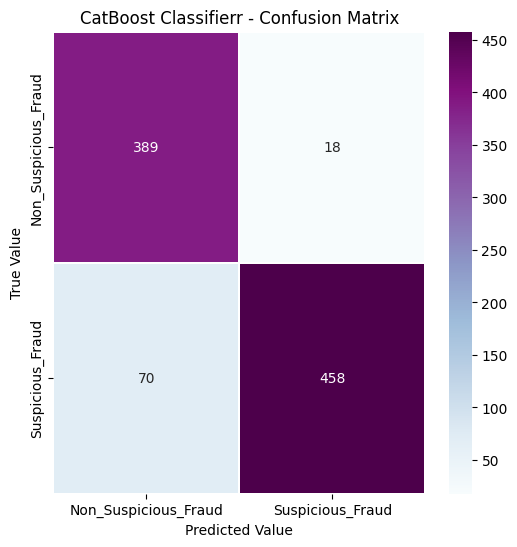

In [ ]:
# Applying CatBoostClassifier model on the encoded data

catboost_clf = CatBoostClassifier()

catboost_clf.fit(X_enc_train, y_enc_train)
catboost_predictions = catboost_clf.predict(X_enc_test)
y_proba = catboost_clf.predict_proba(X_enc_test)[:, 1]
average_precision = average_precision_score(y_enc_test, y_proba)

print("Accuracy score of CatBoost Classifier : {:.2f}".format(accuracy_score(y_enc_test, catboost_predictions)))
print("                                                          ")

print(f"ROC-AUC Score of CatBoost Classifier: {roc_auc_score(y_enc_test, y_proba):.2f}")
print("                                                           ")

print(f"Average Precision-Recall Score of CatBoost Classifier: {average_precision:.2f}")
print("                                                            ")

print(
    "\nCatBoost Classifier Classification report \n {0}".format(
        classification_report(y_enc_test, catboost_predictions)
    )
)

conf_matrix=confusion_matrix(catboost_predictions,y_enc_test)
labels= ['Non_Suspicious_Fraud', 'Suspicious_Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(y_enc_test, catboost_predictions) , '\n')

plt.title("CatBoost Classifierr - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()
